# Deep Learning Frameworks

## Comparison

<img src="https://picpig.com/tssyqjjxdz.png">

more details at http://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-software-frameworks-upc-2016

## We start from theano

Theano features:

- integration with NumPy
- effective analytical computation of gradient (can automatically build expressions to compute gradient)
- fast and stable optimization (can recognize numerical inaccurate expressions and compute them using more stable algorithms)
- transparent usage of GPU
- dynamic C++ code generation


<small>more details at http://theano.readthedocs.io/en/latest/</small>

<center><img  src="imgs/import_theano.jpg"/></center>
<small>courtesy of http://www.marekrei.com/blog/theano-tutorial/</small>

## Installation

#### prerequisites
- If you want fast compiled code (recommended), make sure you have g++ (Windows/Linux) or Clang (OS X) installed.
- miniconda
- `conda install numpy scipy mkl <nose> <sphinx> <pydot-ng>`
- see link below for GPU installation details

#### theano itself
- ```pip install Theano[test, doc]```
- install `libgpuarray`, http://bit.ly/2eeynjd


<small>more details http://theano.readthedocs.io/en/latest/install_macos.html</small>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve
from sklearn.metrics import roc_auc_score

## Import theano and naming conventions

In [2]:
import theano.tensor as T
import theano

## Symbolic expessions for tensors
Theano’s strength is in expressing symbolic calculations involving tensors. There are many types of symbolic expressions for tensors:

* scalar
* vector
* matrix
* tensor
* ...

## Exercise: warming up
* Implement a function that computes the sum of squares of numbers from 0 to N
* Use numpy or python
* An array of numbers 0 to N - np.arange(N)

In [ ]:
def sum_squares(N):
    return <student.Implement_me()>

In [ ]:
%%time
sum_squares(10**8)

## theano teaser

Doing the very same thing

In [3]:
import theano
import theano.tensor as T

In [4]:
#I gonna be function parameter
N = T.scalar("a dimension",dtype='int32')


#i am a recipe on how to produce sum of squares of arange of N given N
result = (T.arange(N)**2).sum()

#Compiling the recipe of computing "result" given N
sum_function = theano.function(inputs = [N],outputs=result)

In [5]:
%%time
sum_function(10**8)

CPU times: user 374 ms, sys: 357 ms, total: 731 ms
Wall time: 988 ms


array(662921401752298880)

## How does it work?
__if you're currently in classroom, chances are i am explaining this text wall right now__
* 1 You define inputs f your future function;
* 2 You write a recipe for some transformation of inputs;
* 3 You compile it;
* You have just got a function!
* The gobbledegooky version: you define a function as symbolic computation graph.


* There are two main kinвs of entities: "Inputs" and "Transformations"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be integers, floats of booleans (uint8) of various size.


* An input is a placeholder for function parameters.
 * N from example above


* Transformations are the recipes for computing something given inputs and transformation
 * (T.arange(N)^2).sum() are 3 sequential transformations of N
 * Doubles all functions of numpy vector syntax
 * You can almost always go with replacing "np.function" with "T.function" aka "theano.tensor.function"
   * np.mean -> T.mean
   * np.arange -> T.arange
   * np.cumsum -> T.cumsum
   * and so on.
   * builtin operations also work that way
   * np.arange(10).mean() -> T.arange(10).mean()
   * Once upon a blue moon the functions have different names or locations (e.g. T.extra_ops)
     * Ask us or google it
 
 
Still confused? We gonna fix that.

In [6]:
#Inputs
example_input_integer = T.scalar("scalar input",dtype='float32')

example_input_tensor = T.tensor4("four dimensional tensor input") # don't be afraid, we won't use it

input_vector = T.vector("", dtype='int32') # vector of integers

In [7]:
#Transformations

#transofrmation: elementwise multiplication
double_the_vector = input_vector*2

#elementwise cosine
elementwise_cosine = T.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector**2 - input_vector


In [ ]:
#Practice time:
#create two vectors of size float32
my_vector = student.init_float32_vector()
my_vector2 = student.init_one_more_such_vector()

In [ ]:
#Write a transformation:
#(vec1)*(vec2) / (sin(vec1) +1)
my_transformation = student.implementwhatwaswrittenabove()

In [ ]:
print (my_transformation)
#it's okay it aint a number

## Exercise: compiling
* So far we were using "symbolic" variables and transformations
 * Defining the recipe for computation, but not computing anything
* To use the recipe, one should compile it

In [ ]:
inputs = [<two vectors that my_transformation depends on>]
outputs = [<What do we compute (can be a list of several transformation)>]

# The next lines compile a function that takes two vectors and computes your transformation
my_function = theano.function(
    inputs,outputs,
    allow_input_downcast=True #automatic type casting for input parameters (e.g. float64 -> float32)
 )

In [ ]:
#using function with, lists:
print ("using python lists:")
print (my_function([1,2,3],[4,5,6]))
print

#Or using numpy arrays:
#btw, that 'float' dtype is casted to secong parameter dtype which is float32
print ("using numpy arrays:")
print (my_function(np.arange(10),
                  np.linspace(5,6,10,dtype='float')))


## Debugging
* Compilation can take a while for big functions
* To avoid waiting, one can evaluate transformations without compiling
* Without compilation, the code runs slower, so consider reducing input size


In [ ]:
#a dictionary of inputs
my_function_inputs = {
    my_vector:[1,2,3],
    my_vector2:[4,5,6]
}

# evaluate my_transformation
# has to match with compiled function output
print (my_transformation.eval(my_function_inputs))


# can compute transformations on the fly
print ("add 2 vectors", (my_vector + my_vector2).eval(my_function_inputs))

#!WARNING! if your transformation only depends on some inputs,
#do not provide the rest of them
print ("vector's shape:", my_vector.shape.eval({
        my_vector:[1,2,3]
    }))


* When debugging, one would generally want to reduce the computation complexity. For example, if you are about to feed neural network with 1000 samples batch, consider taking first 2.
* If you really want to debug graph of high computation complexity, you could just as well compile it (e.g. with optimizer='fast_compile')

### `theano.printing.pprint()`
Theano provides the functions `theano.printing.pprint()` and `theano.printing.debugprint()` to print a graph to the terminal before or after compilation. `pprint()` is more compact and math-like, `debugprint()` is more verbose. Theano also provides `pydotprint()` that creates an image of the function. 

In [ ]:
theano.pprint(my_vector)

In [ ]:
theano.printing.debugprint(my_function)

In [ ]:
theano.printing.pydotprint(my_function, outfile="graph.png", var_with_name_simple=True)
Image('./graph.png')

## Exercises

In [ ]:
# Let's define two vector and two scalar placeholders
x = T.vector() 
y = T.vector()
alpha = T.scalar()
beta = T.scalar()

# define values for each placeholder 
x_val = np.arange(10)
y_val = np.arange(10)
alpha_val = 0.1
beta_val = 0.3

* compute $z = (x_1 + y_1^2, x_2 + y_2^2, ...)^T$: define theano function and evaluate it

* compute $||\textbf{x}||$

* compute $(\textbf{x} \cdot \alpha \textbf{y} + \beta \textbf{x} \cdot \textbf{y})^2$

# Shared variables

* The inputs and transformations only exist when function is called

* Shared variables always stay in memory like global variables
 * Shared variables can be included into a symbolic graph
 * They can be set and evaluated using special methods
   * but they can't change value arbitrarily during symbolic graph computation
   * we'll cover that later;
 
 
* Hint: such variables are a perfect place to store network parameters
 * e.g. weights or some metadata

In [10]:
#creating shared variable
shared_vector = theano.shared(np.ones(10,dtype='float64'))

In [11]:

#evaluating shared variable (outside symbolicd graph)
print ("initial value",shared_vector.get_value())

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

initial value [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [12]:
#setting new value
shared_vector.set_value( np.arange(5) )

#getting that new value
print ("new value", shared_vector.get_value())

#Note that the vector changed shape
#This is entirely allowed... unless your graph is hard-wired to work with some fixed shape

new value [ 0.  1.  2.  3.  4.]


## Almost done - Updates

* updates are a way of changing shared variables at after function call.

* technically it's a dictionary {shared_variable : a recipe for new value} which is has to be provided when function is compiled

That's how it works:

In [13]:
# Multiply shared vector by a number and save the product back into shared vector
input_scalar = T.scalar()
scalar_times_shared = input_scalar * shared_vector

inputs = [input_scalar]
outputs = [scalar_times_shared] #return vector times scalar

my_updates = [
    (shared_vector, scalar_times_shared) #and write this same result bach into shared_vector
]

compute_and_save = theano.function(inputs, outputs, updates=my_updates)

In [14]:
shared_vector.set_value(np.arange(5))

#initial shared_vector
print ("initial shared value:" ,shared_vector.get_value())

# evaluating the function (shared_vector will be changed)
print ("compute_and_save(2) returns",compute_and_save(2))

#evaluate new shared_vector_1
print ("new shared value:" ,shared_vector.get_value())



initial shared value: [ 0.  1.  2.  3.  4.]
compute_and_save(2) returns [array([ 0.,  2.,  4.,  6.,  8.])]
new shared value: [ 0.  2.  4.  6.  8.]


## Gradient, T.grad - why theano matters
* Theano can compute derivatives and gradients automatically
* Derivatives are computed symbolically, not numerically

Limitations:
* You can only compute a gradient of a __scalar__ transformation over one or several scalar or vector (or tensor) transformations or inputs.
* A transformation has to have float32 or float64 dtype throughout the whole computation graph
 * derivative over an integer has no mathematical sense


### 1D gradient (derivative)

In [15]:
x = T.scalar(name='x') 
function1d = x ** 2 + T.log(x)
function1d_derivative = T.grad(function1d, x)

In [16]:
# let's compile it
compiled_derivative = theano.function([x], outputs=[function1d_derivative])
compiled_f = theano.function([x], function1d)

In [17]:
# optimizations were done during compilation
theano.printing.debugprint(compiled_derivative)

Elemwise{Composite{((i0 * i1) + inv(i1))}} [id A] ''   0
 |TensorConstant{2.0} [id B]
 |x [id C]


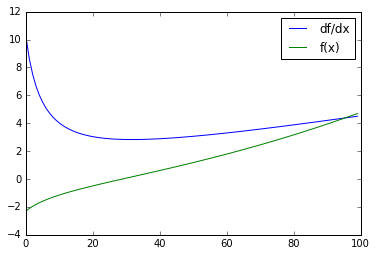

In [18]:
xarray = np.linspace(0.1, 2, 100)
plt.plot([compiled_derivative(point) for point in xarray], label="df/dx")
plt.plot([compiled_f(point) for point in xarray], label="f(x)")
_ = plt.legend()

Or you can compute gradient wrt set of variables

In [19]:
b = theano.shared(6.0)
x = T.scalar(dtype='float64')
function1d = x ** 2 + T.log(x) + b
function1d_derivative = T.grad(function1d, [x, b])
compiled_derivative = theano.function([x], function1d_derivative)
compiled_f = theano.function([x], function1d)



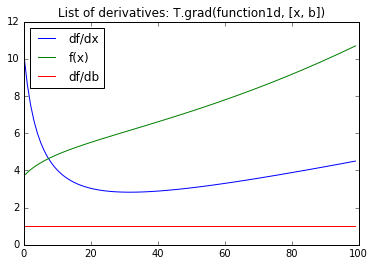

In [20]:
xarray = np.linspace(0.1, 2, 100)
plt.plot([compiled_derivative(point)[0] for point in xarray], label="df/dx")
plt.plot([compiled_f(point) for point in xarray], label="f(x)")
plt.plot([compiled_derivative(point)[1] for point in xarray], label="df/db")

plt.title("List of derivatives: T.grad(function1d, [x, b])")
_ = plt.legend(loc="upper left")

### NDimensional gradient

In [21]:
x = T.vector(name='x') 
function = T.sum(x * x)
function_gradient = T.grad(function, x)

In [22]:
compiled_gradient = theano.function([x], function_gradient)

In [23]:
compiled_gradient([1, 2, 4, 0])

array([ 2.,  4.,  8.,  0.])

In [24]:
theano.printing.debugprint(compiled_gradient)

Elemwise{add,no_inplace} [id A] ''   0
 |x [id B]
 |x [id B]


## Why that rocks

In [ ]:
my_vector = T.vector('float64')

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = ((my_vector+my_scalar)**(1+T.var(my_vector)) +1./T.arcsinh(my_scalar)).mean()/(my_scalar**2 +1) + 0.01*T.sin(2*my_scalar**1.5)*(T.sum(my_vector)* my_scalar**2)*T.exp((my_scalar-4)**2)/(1+T.exp((my_scalar-4)**2))*(1.-(T.exp(-(my_scalar-4)**2))/(1+T.exp(-(my_scalar-4)**2)))**2

der_by_scalar,der_by_vector = <student.compute_grad_over_scalar_and_vector()>

compute_weird_function = theano.function([my_scalar,my_vector],weird_psychotic_function)
compute_der_by_scalar = theano.function([my_scalar,my_vector],der_by_scalar)

In [ ]:
#Plotting your derivative
vector_0 = [1,2,3]

scalar_space = np.linspace(0,7)

y = [compute_weird_function(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y,label='function')
y_der_by_scalar = [compute_der_by_scalar(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y_der_by_scalar,label='derivative')
plt.grid();plt.legend()


## Matrix

#### Compute $||A\textbf{x}||^2$:

In [ ]:
x = T.vector('x')
A = T.matrix('A')
z = A.dot(x)
normAx = theano.function([x, A], z.dot(z))
normAx([0, 2], [[1, 1], [1, 1]])

## Exercises

* compile a function which takes an array $x$ with three elements and computes $x_0^3 + \sin{x_1}*\cos{x_2}$. Check it by computing at any point

* compute gradient for previous function w.r.t. x

* compute gradient for $||A\textbf{x}|| + \alpha * ||\textbf{x}||$ 

## Logistic regression 

In [ ]:
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits

## Logistic regression description:

$p_i = \sigma(\sum_k X_{ik} w_k + b)$

$\text{llh}=\sum_i y_i \log{p_i} + (1-y_i)\log{(1 - p_i)}\qquad$  (here $y \in \{0, 1\}$)

$loss = -\text{llh}, \qquad loss \to \min$



## Exercise 

Let's build logistic regression to discriminate 0 from 1 on MNIST dataset

Write loss function and its gradient using theano (create compiled expressions).

Implement the regular logistic regression training algorithm (weights -= 0.01 * grad)

Tips:
* Weights fit in as a shared variable
* X and y are inputs
* Compile 2 functions:
 * train_function(X,y) - returns error and computes weights' new values __(through updates)__
 * predict_fun(X) - just computes probabilities ("y") given data
* output labels - {0, 1}
* while computing log() beware of log(0) (by adding very small epsilon value)
* You can **use** `T.nnet.sigmoid`

In [ ]:
mnist = load_digits(2)

X,y = mnist.data, mnist.target

print ("y [shape - %s]:"%(str(y.shape)),y[:10])
print ("X [shape - %s]:"%(str(X.shape)))
print (X[1])
print (y[:10])

In [ ]:
X[0].reshape(8,-1)

In [ ]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.autumn)

In [ ]:
# inputs and shared variable, try initializing with 0s, 1s and np.random.rand
shared_weights = # shared vector of weights
shared_bias = # shared bias term
input_X = # matrix of digits vs features
input_y = # vector of labels

Let's define expressions for predicted values and loss function

In [ ]:
predicted_y = # prediction of p_i
eps =  # very small value
loss = # <logistic loss (scalar sum)>

In [ ]:
grad_weight, grad_bias = # write gradient wrt shared_weights, shared_bias

shared_updates = [
    ... # update weights and bias
]

Now we have expessions for loss and its gradient and we need to use some optimization method

In [ ]:
predict_function = # <compile function that takes X and computes probabilities of y>
train_function = #<compile function that takes X and y, returns log loss and updates weights>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
predict_function(X_test)[:20]

In [ ]:
shared_weights.set_value(0.001*np.random.rand(shared_weights.eval().shape[0]))
shared_weights.set_value(0.1*np.random.rand(shared_weights.eval().shape[0]))

plt.figure(figsize=(10,2))
shared_bias.set_value(0.01*np.random.rand())
for i in range(5):
    loss_i = train_function(X_train,y_train)
    print ("loss at iter %i:%.4f"%(i, loss_i))
    print ("train auc:",roc_auc_score(y_train, predict_function(X_train)))
    print ("test auc:",roc_auc_score(y_test, predict_function(X_test)))
    plt.subplot(1, 5, i+1)
    plt.imshow(shared_weights.eval().reshape(8,-1), cmap=plt.cm.summer)
    _ = plt.colorbar()

In [ ]:
# It's time to plot ROC curve
y_pred = predict_function(X_test)

plt.plot(*roc_curve(y_test,y_pred)[:2], lw=4)
plt.xlabel("1 - background rejection")
plt.ylabel("Signal efficiency")

## Quiz

1. Why shape of weights reminds shape of '0'?
2. Why test AUC sometimes higher than train AUC?
3. How quality depends on gradient coefficients?